In [1]:
%load_ext autoreload
%autoreload 2

# To-do list:
- Check what's wrong with savers
- Simplify the passing of inputs of montecarlo_game() functions

In [2]:
import kala

import networkx as nx
import pandas as pd
import numpy as np

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
from main_functions import montecarlo_game_sbm, montecarlo_game_network

## How does the wealth of a group evolve with respect to the network structure?

### We first start by setting up the constant parameters

In [4]:
## These are the constants not refering to the interactions

num_players = 50
num_steps = 200
num_simulations = 100

In [5]:
## These are the constants refering to the interactions

# How much more do savers win when interacting with another
differential_efficient = 0.3
# How much do savers lose when interacting with a non-saver
differential_inefficient = 0.5

# Number of games that players save in their memory
memory_length = 4
# Memory rule
update_rule = kala.models.memory_rules.AverageMemoryRule()

# Standard deviation of log normal distribution
def standard_deviation(eta):
    return eta**2


### 1 - Baseline: Stochastic Block Model

100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


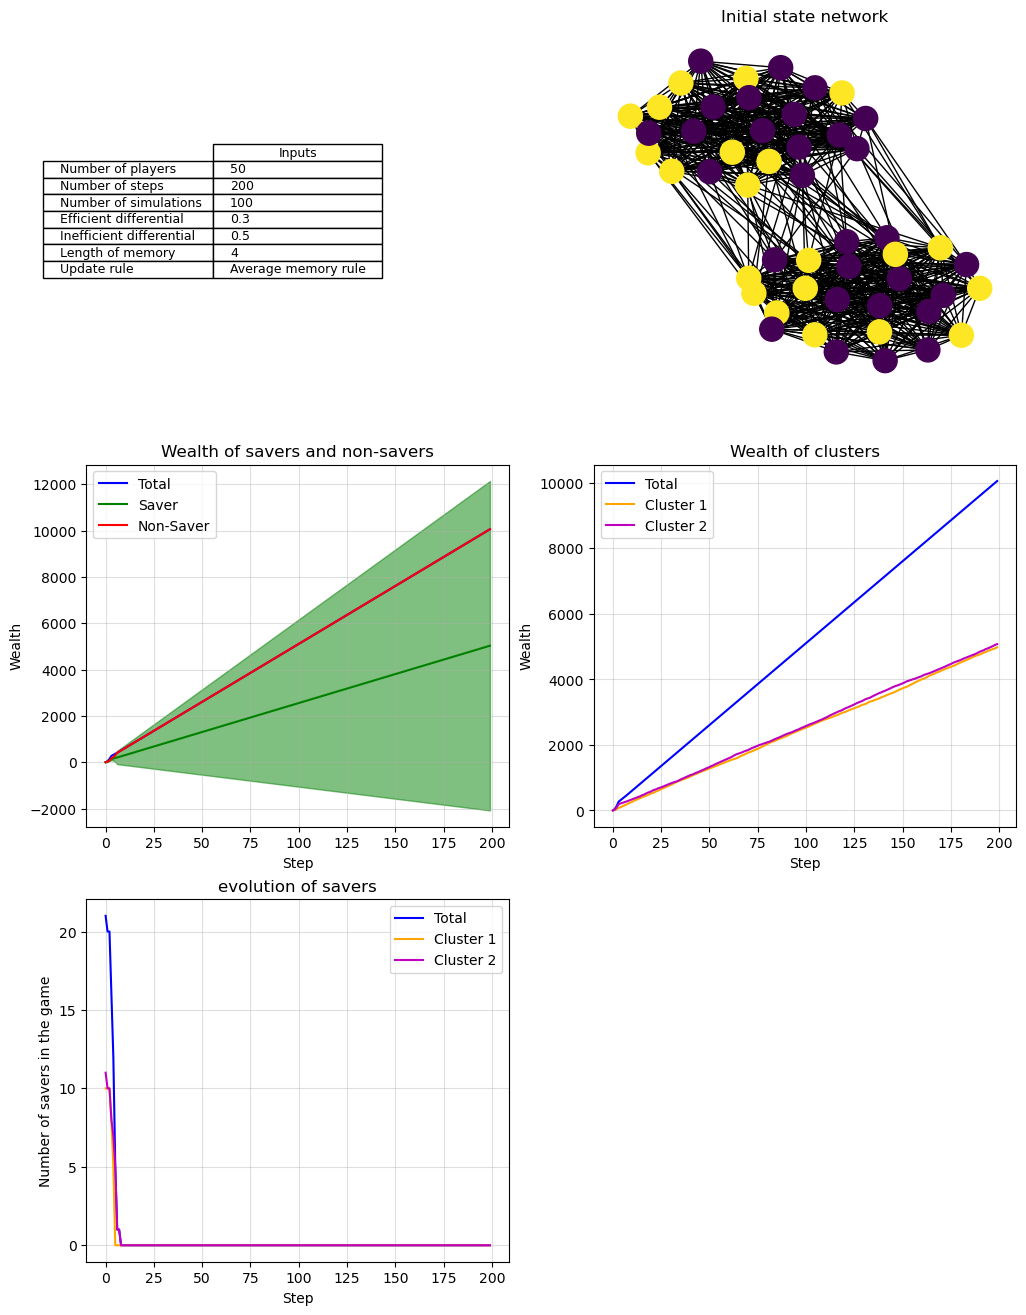

In [87]:
# Proportions of savers in each cluster of SBM
threshold = [0.5, 0.5]

montecarlo_game_sbm(num_steps,
                    num_simulations,
                    num_players,
                    threshold,
                    differential_efficient,
                    differential_inefficient,
                    standard_deviation,
                    memory_length,
                    update_rule)

### 2 - Other network structures

  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00,  2.68it/s]


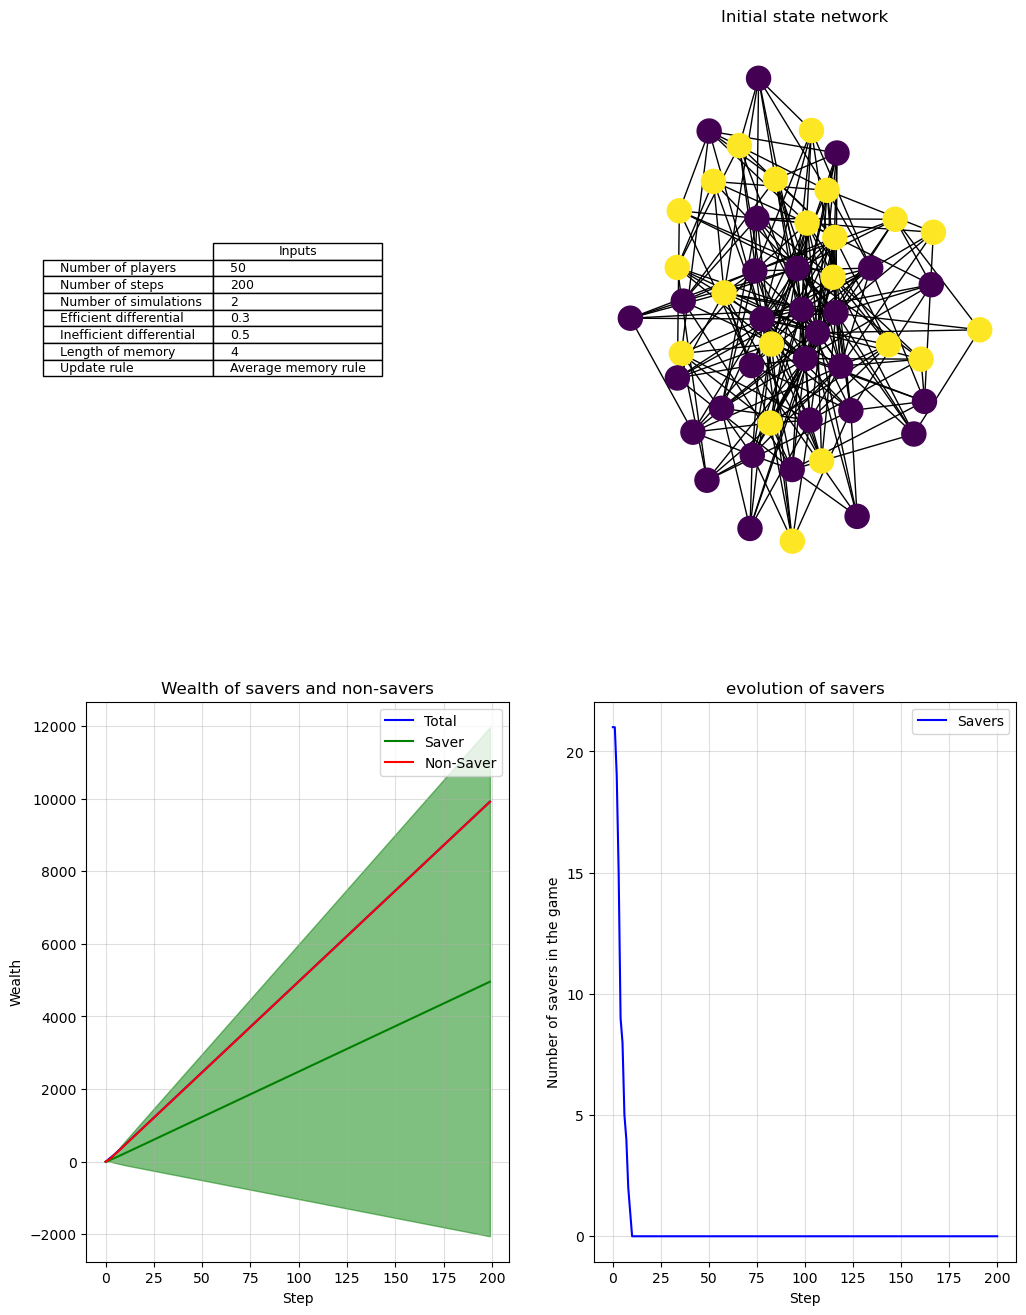

In [104]:
# Initialise network
m = np.random.randint(1, num_players)
g = nx.barabasi_albert_graph(num_players, m)

montecarlo_game_network(g,
                        num_steps,
                        num_simulations,
                        num_players,
                        threshold,
                        differential_efficient,
                        differential_inefficient,
                        standard_deviation,
                        memory_length,
                        update_rule)